# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer,recall_score


# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Projects_MLDS/ExtraaLearn.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f



**Observations**:

*   There are 4612 observations and 15 columns in the dataset.
*   All the columns have 4612 non-null values, i.e., there are no missing values in the data.



Let's check the unique values in each column

In [ ]:
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

**Observations:**

-  **ID of the lead** is unique for each employee and **we can drop this column** as it would not add any value to our analysis.
- On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.

**Let's drop the columns mentioned above** and define lists for numerical and categorical columns to explore them separately.

In [ ]:
# Dropping the columns
data=data.drop(['ID'],axis=1)

In [ ]:
data.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
col_cat= data.select_dtypes(include=['object']).columns
col_numeric=data.select_dtypes(include=['number']).columns
col_numeric=[x for x in col_numeric if x != 'status']
col_cat=col_cat.append(pd.Index(['status']))


In [ ]:
# Checking summary statistics
data[col_numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434




**Observations:**

*  Average lead age is around 46 years. It has a high range, from 18 years to 63, indicating interest in the learning for broad comunity.
*  On avareage  lead visited the website 3-4 times. There is a big difference between the 3rd quartile value (around 5 visits) and the maximum value (30 visits).
*  On avareage  lead spend on website 724 time slots this value differs from the median value of time spent (376)  indicated that data are right screwed. There is a big difference between the 3rd quartile value (around 1337) and the maximum value (2537).  
*  On avareage  lead see 3 page_views_per_visit.


In [ ]:
data[col_cat].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
current_occupation,4612,3,Professional,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,4612,2,Website,2542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,4612,3,High,2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_activity,4612,3,Email Activity,2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,4612,2,No,4115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type2,4612,2,No,4379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
digital_media,4612,2,No,4085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educational_channels,4612,2,No,3907,NaN,NaN,NaN,NaN,NaN,NaN,NaN
referral,4612,2,No,4519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,4612.0,NaN,NaN,NaN,0.298569,0.45768,0.0,0.0,0.0,1.0,1.0


In [ ]:
# Printing the % sub categories of each category
for i in col_cat:
    print(data[i].value_counts(normalize=True))
    print('*'*40)

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
****************************************
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
****************************************
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
****************************************
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
****************************************
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
****************************************
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
****************************************
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
****************************************
No     0.847138
Yes    0.152862
Name: educational_channels, dtype: float64
******



**Observations:**

*   The lead converesion converted to a paid is 30%.
*   Mosts of lead knows about the about ExtraaLearn from sourser differet than shown in the table: 97% of lead heard about ExtraaLearn not from reference; 84% of lead  heard about ExtraaLearn not from educational_channels; 89% of lead heard about ExtraaLearn not from digital media; 95% the lead had not seen the ad of ExtraaLearn in the Magazine;89 % the lead had not seen the ad of ExtraaLearn in the Newspaper.
*   49% of potential customers(lead) seeking for details about program through email; 27% of potential customers(lead) had a Phone Conversation with representative, Had conversation over SMS with representative, etc; 23% of potential customers(lead) interacted on live chat with representative, Updated profile on website.
*   49.1% of potential customers(lead) profile has been High (75-100%) filled on the website/mobile app; 48.6% of potential customers(lead) profile has been Medium(50-75%) filled on the website/mobile app; 2.3%  of potential customers(lead) profile has been Low (0-50%) filled on the website/mobile app.
*   55% of potential custermers(lead) first interacted with ExtraaLearn through Website; 45% of potential custermers(lead) first interacted with ExtraaLearn through Mobile App.
*   57%  of potential custermers(lead) are Professionals,  32% are Unemployed, 12% are Students.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
def hist_box(data, col, hue_col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    sns.boxplot(data=data,x=col,y='status',ax=ax_box,showfliers=True,showmeans=True,orient='h')
    sns.histplot(data=data, x=col, hue=hue_col, kde=True, ax=ax_hist)
    plt.show()

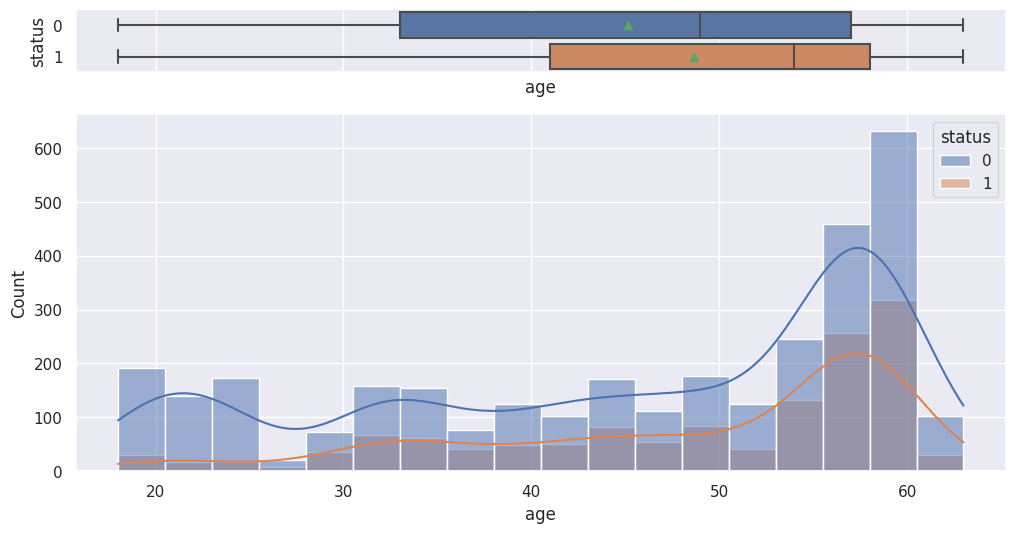

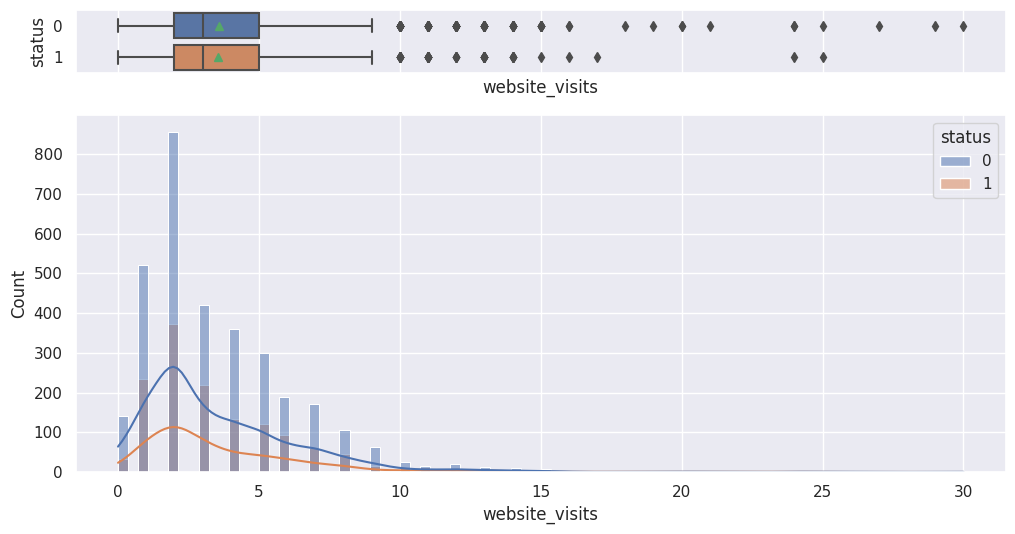

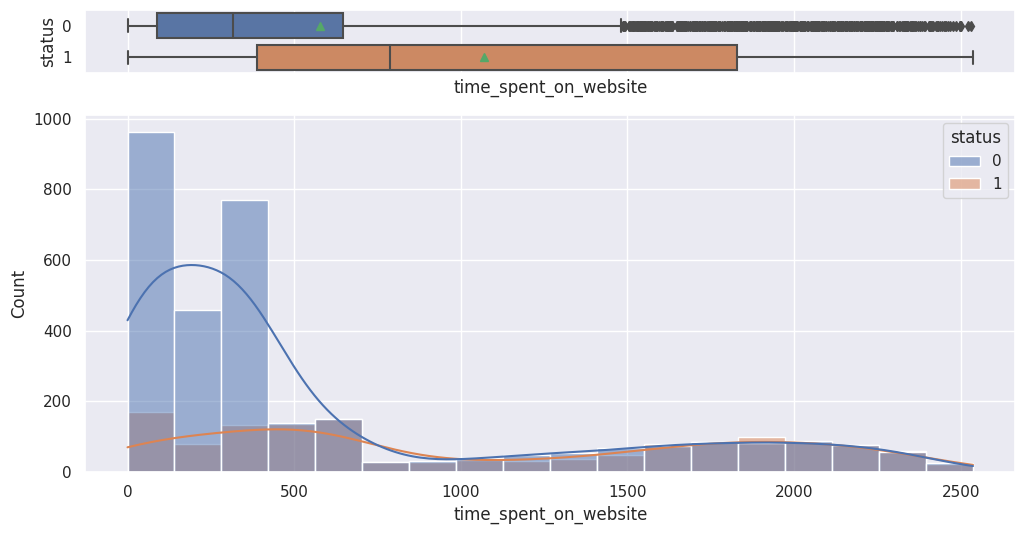

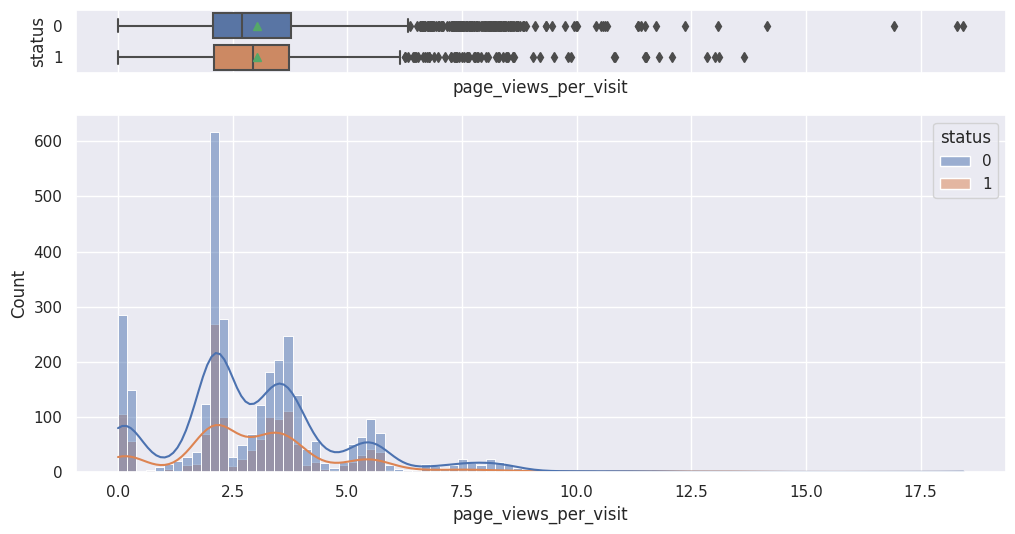

In [ ]:
# Creating histograms
for col in col_numeric:
  hist_box(data, col, 'status')

In [ ]:
data.groupby(['status'])[col_numeric].median()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,49.0,3.0,317.0,2.706
1,54.0,3.0,789.0,2.935


In [ ]:
data.groupby(['status'])[col_numeric].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050




**Observations:**

* The age distribution is leaft skewed; both median and mean age for the leads who converted to the paid customers is hiegher compare to the one who not converted (54 and 48) vs (49 and 45).
* The website visits is close to normal distribution, skewed to the right. On avarage number of visits for lead who converted to paid customers is the same to the one who not converted 3.
*  The time_spent_on_website distribution is right skewed and leads which decides to become paied customers spend more time on the web site mean 1068 (median 789) vs mean 577 (median 317).
* The median value for the page views per visit for leads which decides to become paied customers is slightly larger (2.9 vs 2.7)




<Axes: >

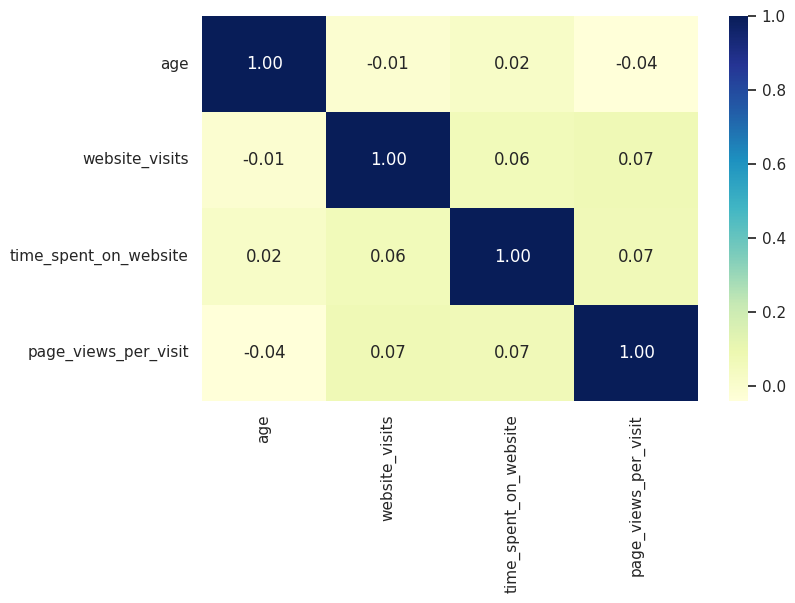

In [ ]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(8,5))
sns.heatmap(data[col_numeric].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')



**Observations:**
There is no noticible correlatiot between numerical variables.




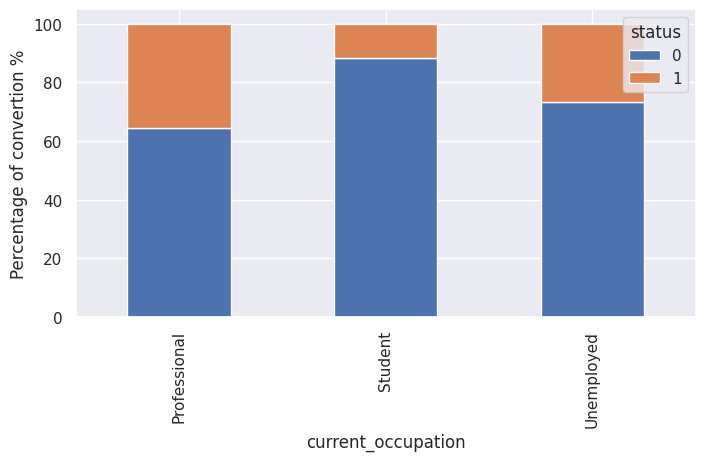

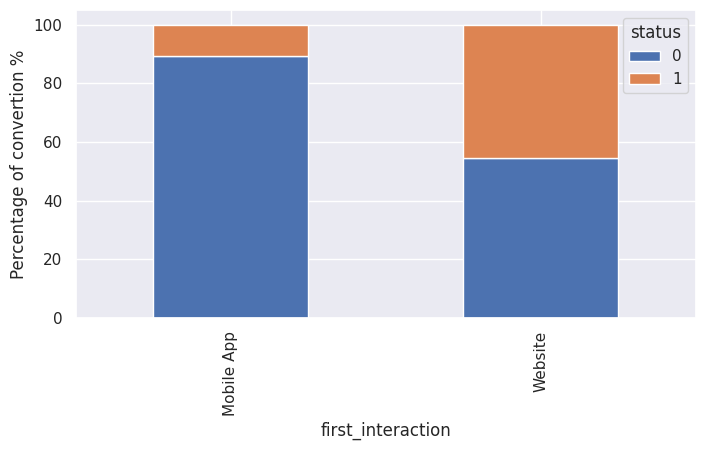

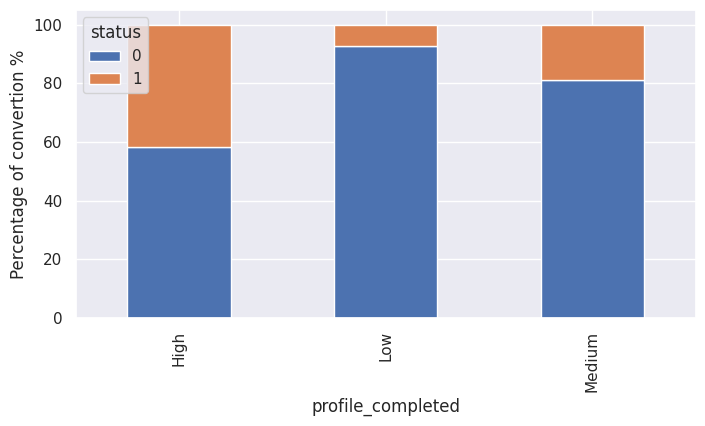

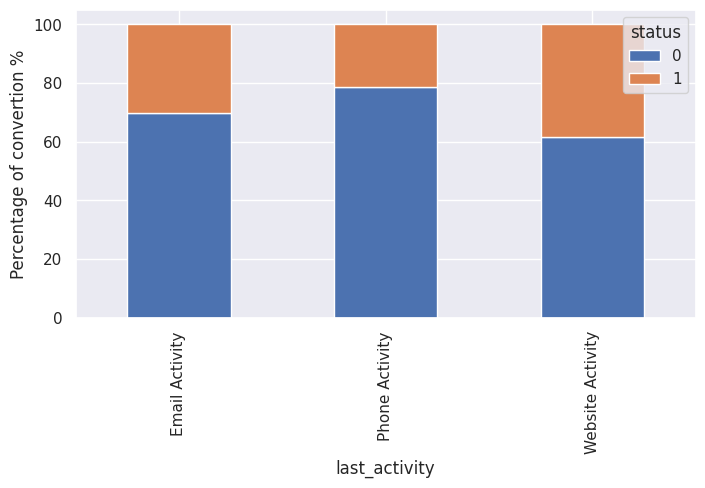

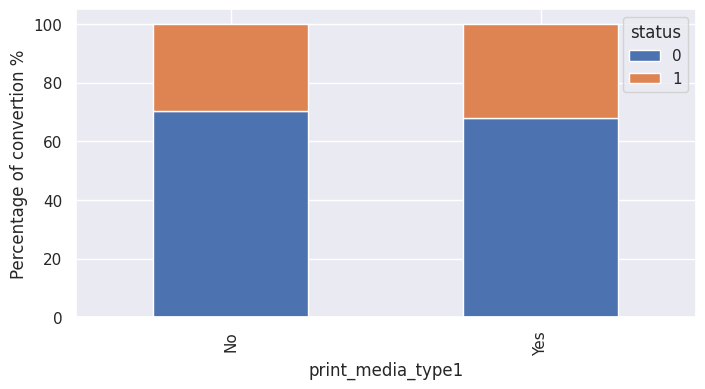

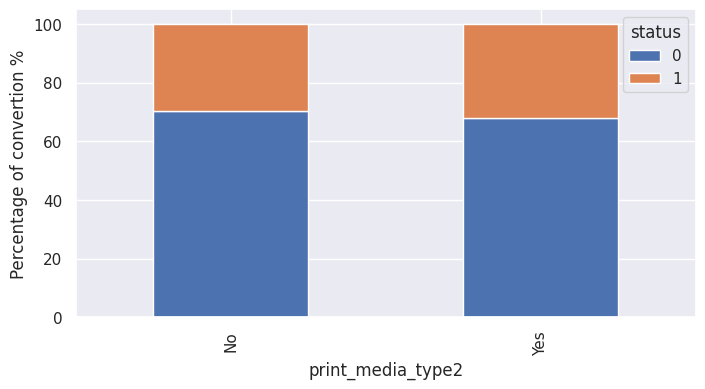

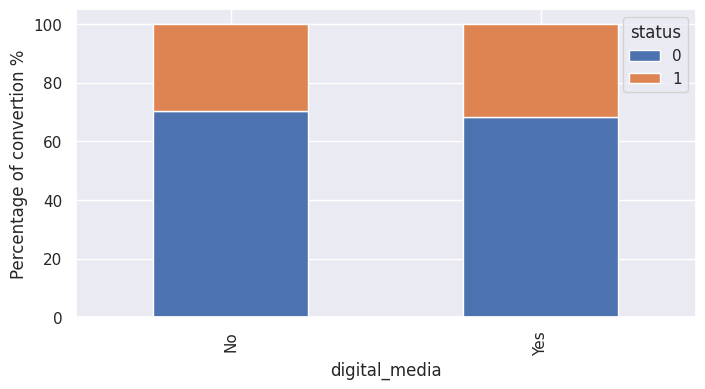

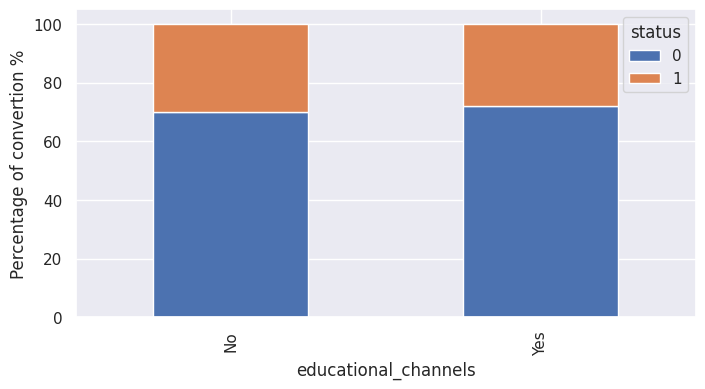

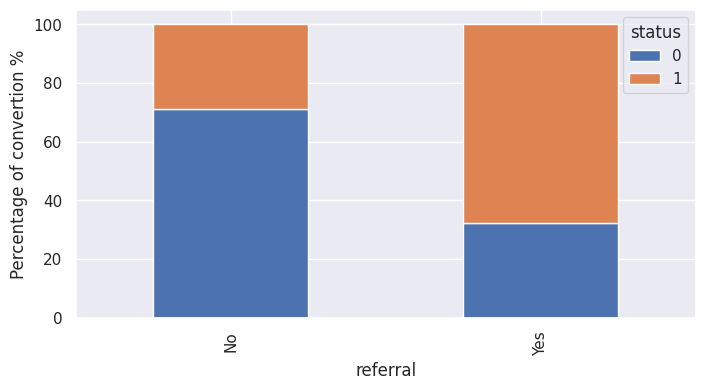

In [ ]:
for i in col_cat:
    if i!='status':
        (pd.crosstab(data[i],data['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage of convertion %')

**Observations:**
* Among professionals(aprox 35%) and unemployed (aprox 25%)  leads conversion to paied customers is higher compare to studens (aprox 15%).
* The interaction with website works better for conversion of lead to paied customers compare to whats app aprox 45% vs aprox 10%.
* Print media, digital media almost has no effect on conversion of leads to the paid customers. On the contrary referals channel works well for conversion of leads to the paid customers.
* People with high filled profile are more likely to become paid customers.


In [ ]:
col_cat

Index(['current_occupation', 'first_interaction', 'profile_completed',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral', 'status'],
      dtype='object')

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
X = data.drop(['status'], axis=1)
Y = data['status'] # Complete the code to define the dependent (target) variable

to_get_dummies_for = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']

X = pd.get_dummies(data = X, columns = to_get_dummies_for, drop_first = True)


Maping_Yes_No = {'Yes': 1, 'No':0}

Yes_No_col = ['print_media_type1', 'print_media_type2','digital_media', 'educational_channels', 'referral']

for col in Yes_No_col:
  X[col]=X[col].map(Maping_Yes_No)

X.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
0,57,7,1639,1.861,1,0,1,0,0,0,1,1,0,0,0,1
1,56,2,83,0.320,0,0,0,1,0,0,0,0,0,1,0,1
2,52,3,330,0.074,0,0,1,0,0,0,0,1,0,1,0,1
3,53,4,464,2.057,0,0,0,0,0,0,1,1,0,0,0,1
4,23,4,600,16.914,0,0,0,0,0,1,0,1,0,0,0,0


In [ ]:
#Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.30, random_state=1, stratify = Y)


In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not converted', 'converted'], yticklabels=['Not converted ', 'converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision Tree model

In [ ]:
dt = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



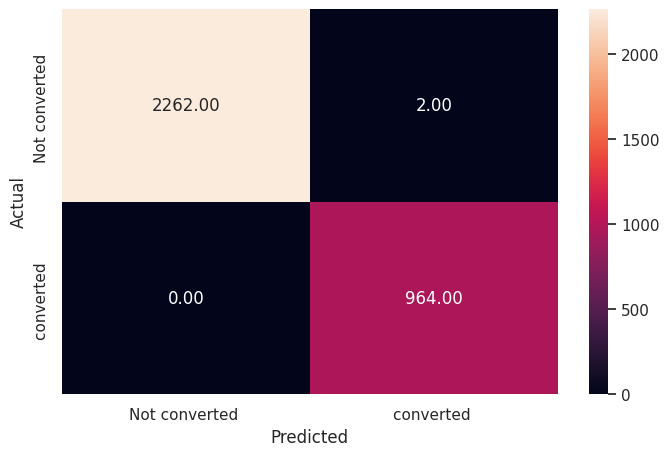

In [ ]:
y_train_predict_dt=dt.predict(X_train)
metrics_score(y_train, y_train_predict_dt)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       971
           1       0.65      0.62      0.64       413

    accuracy                           0.79      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.79      0.79      0.79      1384



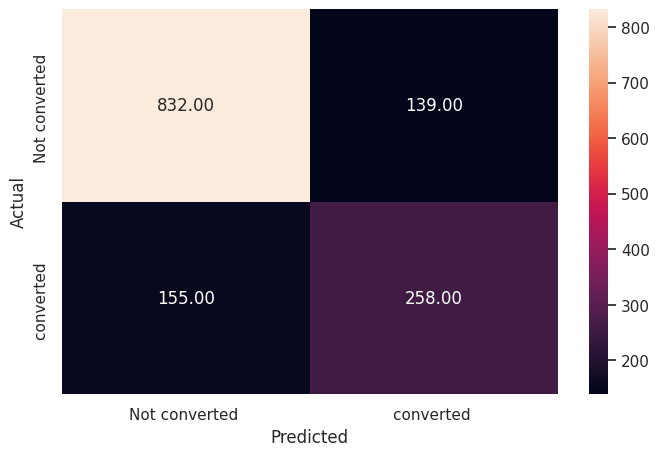

In [ ]:
y_test_predict_dt=dt.predict(X_test)
metrics_score(y_test, y_test_predict_dt)



**Observations:**

* The Decision Tree works well on the training data but not so well on the test data as the recall is 0.62 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data.
* The precision on the test data suggests that there's a 35% (1 - 0.65) chance that the model will predict that a person is going to become paied customer.



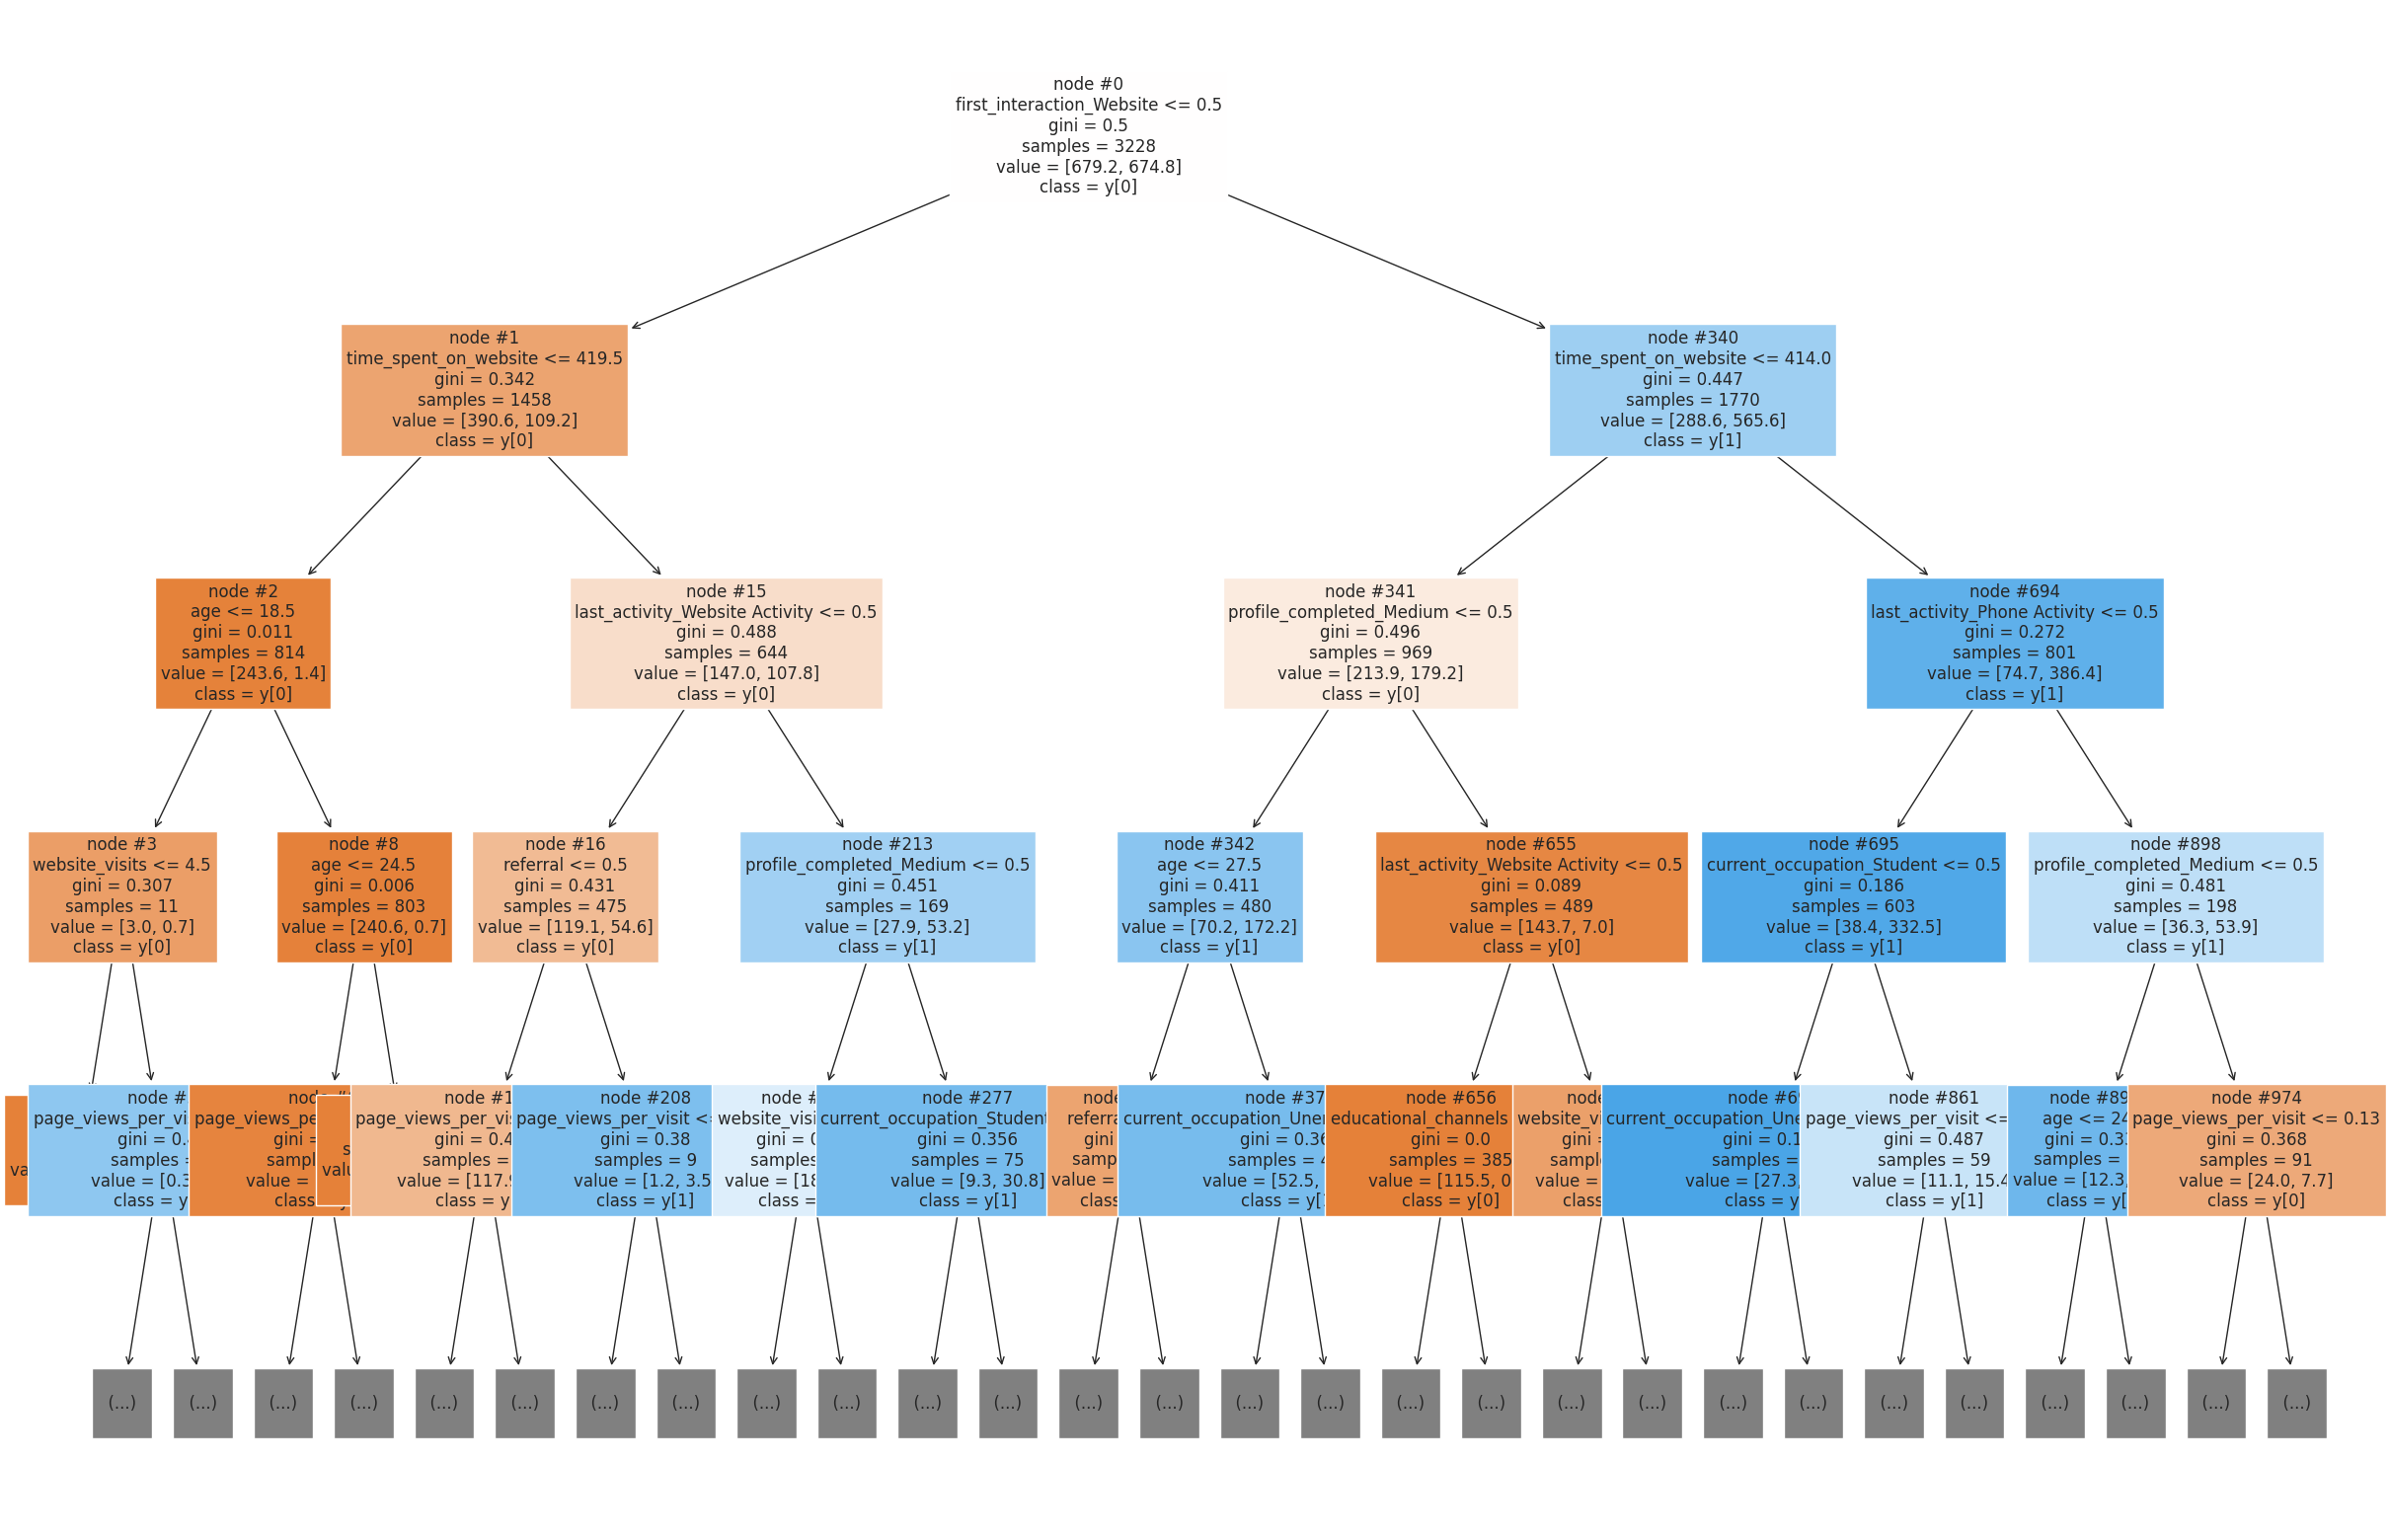

In [ ]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

<Axes: xlabel='Importance'>

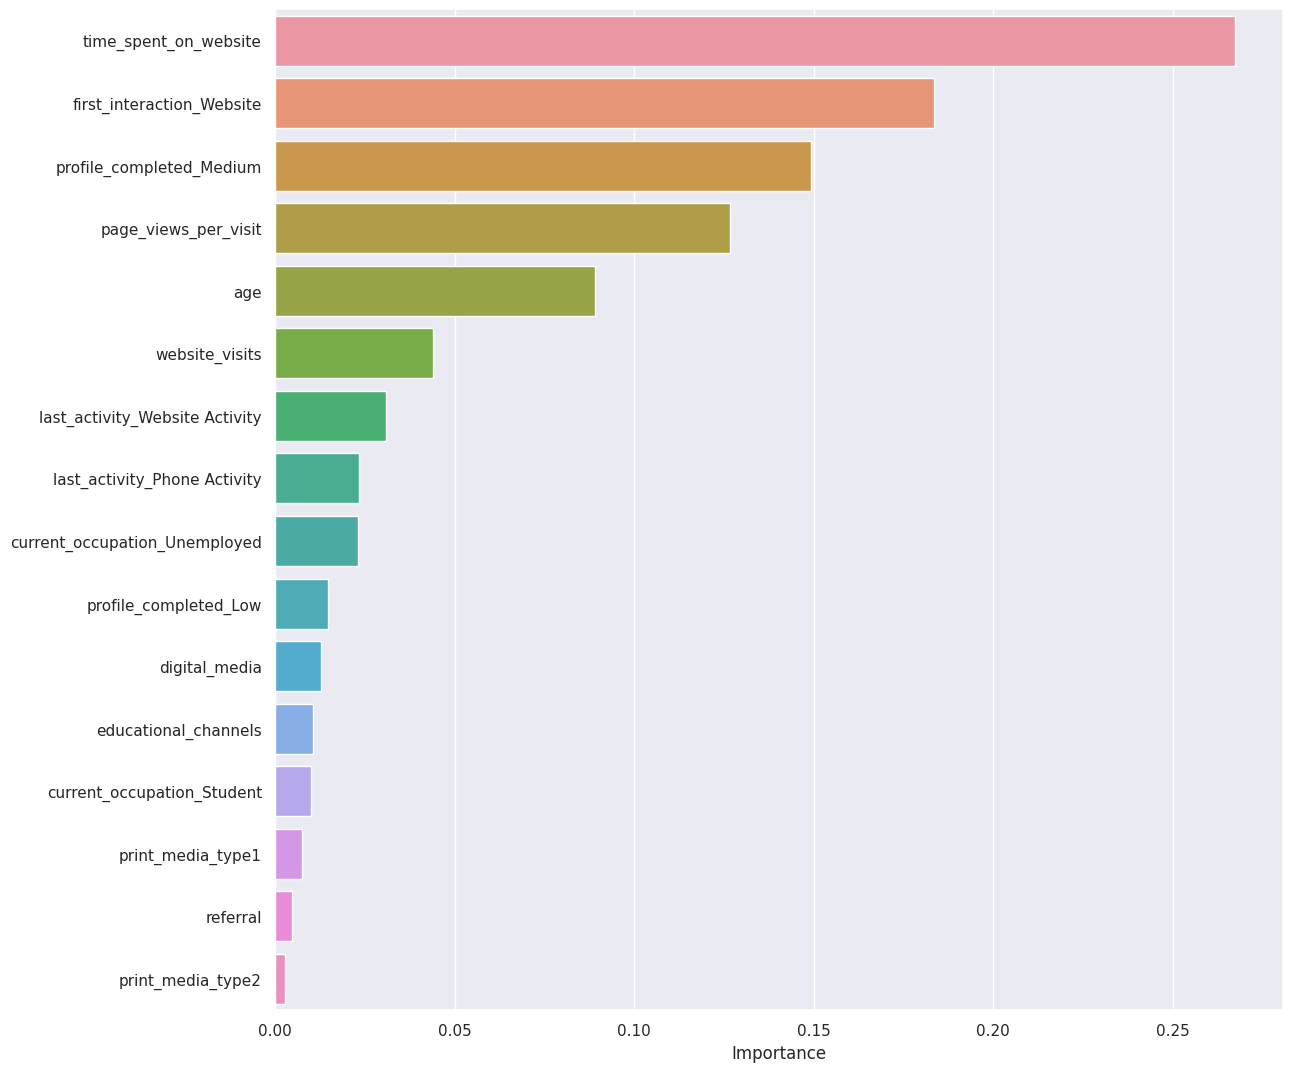

In [ ]:
importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index)



Observations:

According to the Decision Tree, time_spent_on_website is the most important feature, followed by First_Interaction_Website, Medium completion of profile, page views per visit, Age and website visits.




## Do we need to prune the tree?

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=21,
                       max_leaf_nodes=50, min_samples_split=70, random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      2264
           1       0.73      0.88      0.80       964

    accuracy                           0.87      3228
   macro avg       0.84      0.87      0.85      3228
weighted avg       0.88      0.87      0.87      3228



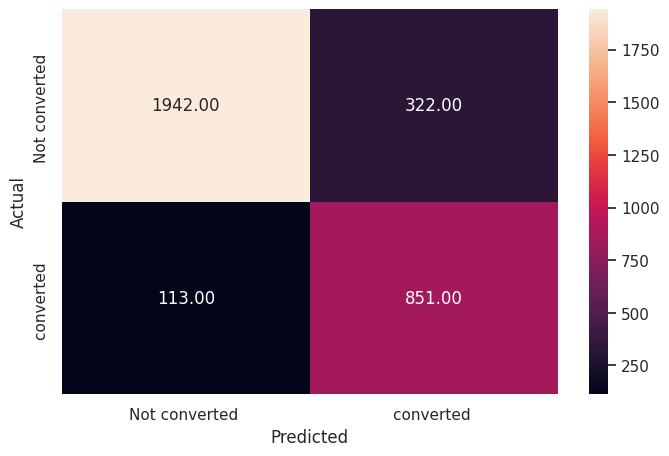

In [ ]:
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       971
           1       0.69      0.80      0.74       413

    accuracy                           0.83      1384
   macro avg       0.80      0.82      0.81      1384
weighted avg       0.84      0.83      0.84      1384



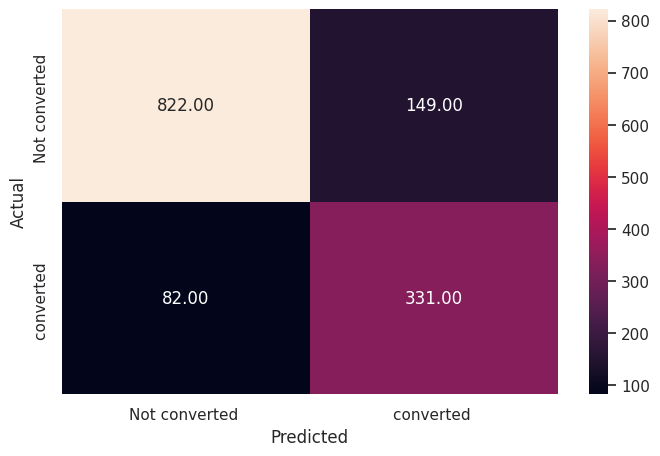

In [ ]:
dt_tuned_test = estimator.predict(X_test)
metrics_score(y_test,dt_tuned_test)


**Observations:**
* Hyperparameter tune helped to improve the model perfomance. Therefor pruning of the tree was needed
* Model does not demonstrate massive overfitting of the data the recall is the test set is 0.80 in comparison to 0.88 for the training dataset.
* The precision on the test data suggests that there's a 31% (1 - 0.69) chance that the model will predict that a person is going to become paied customer.

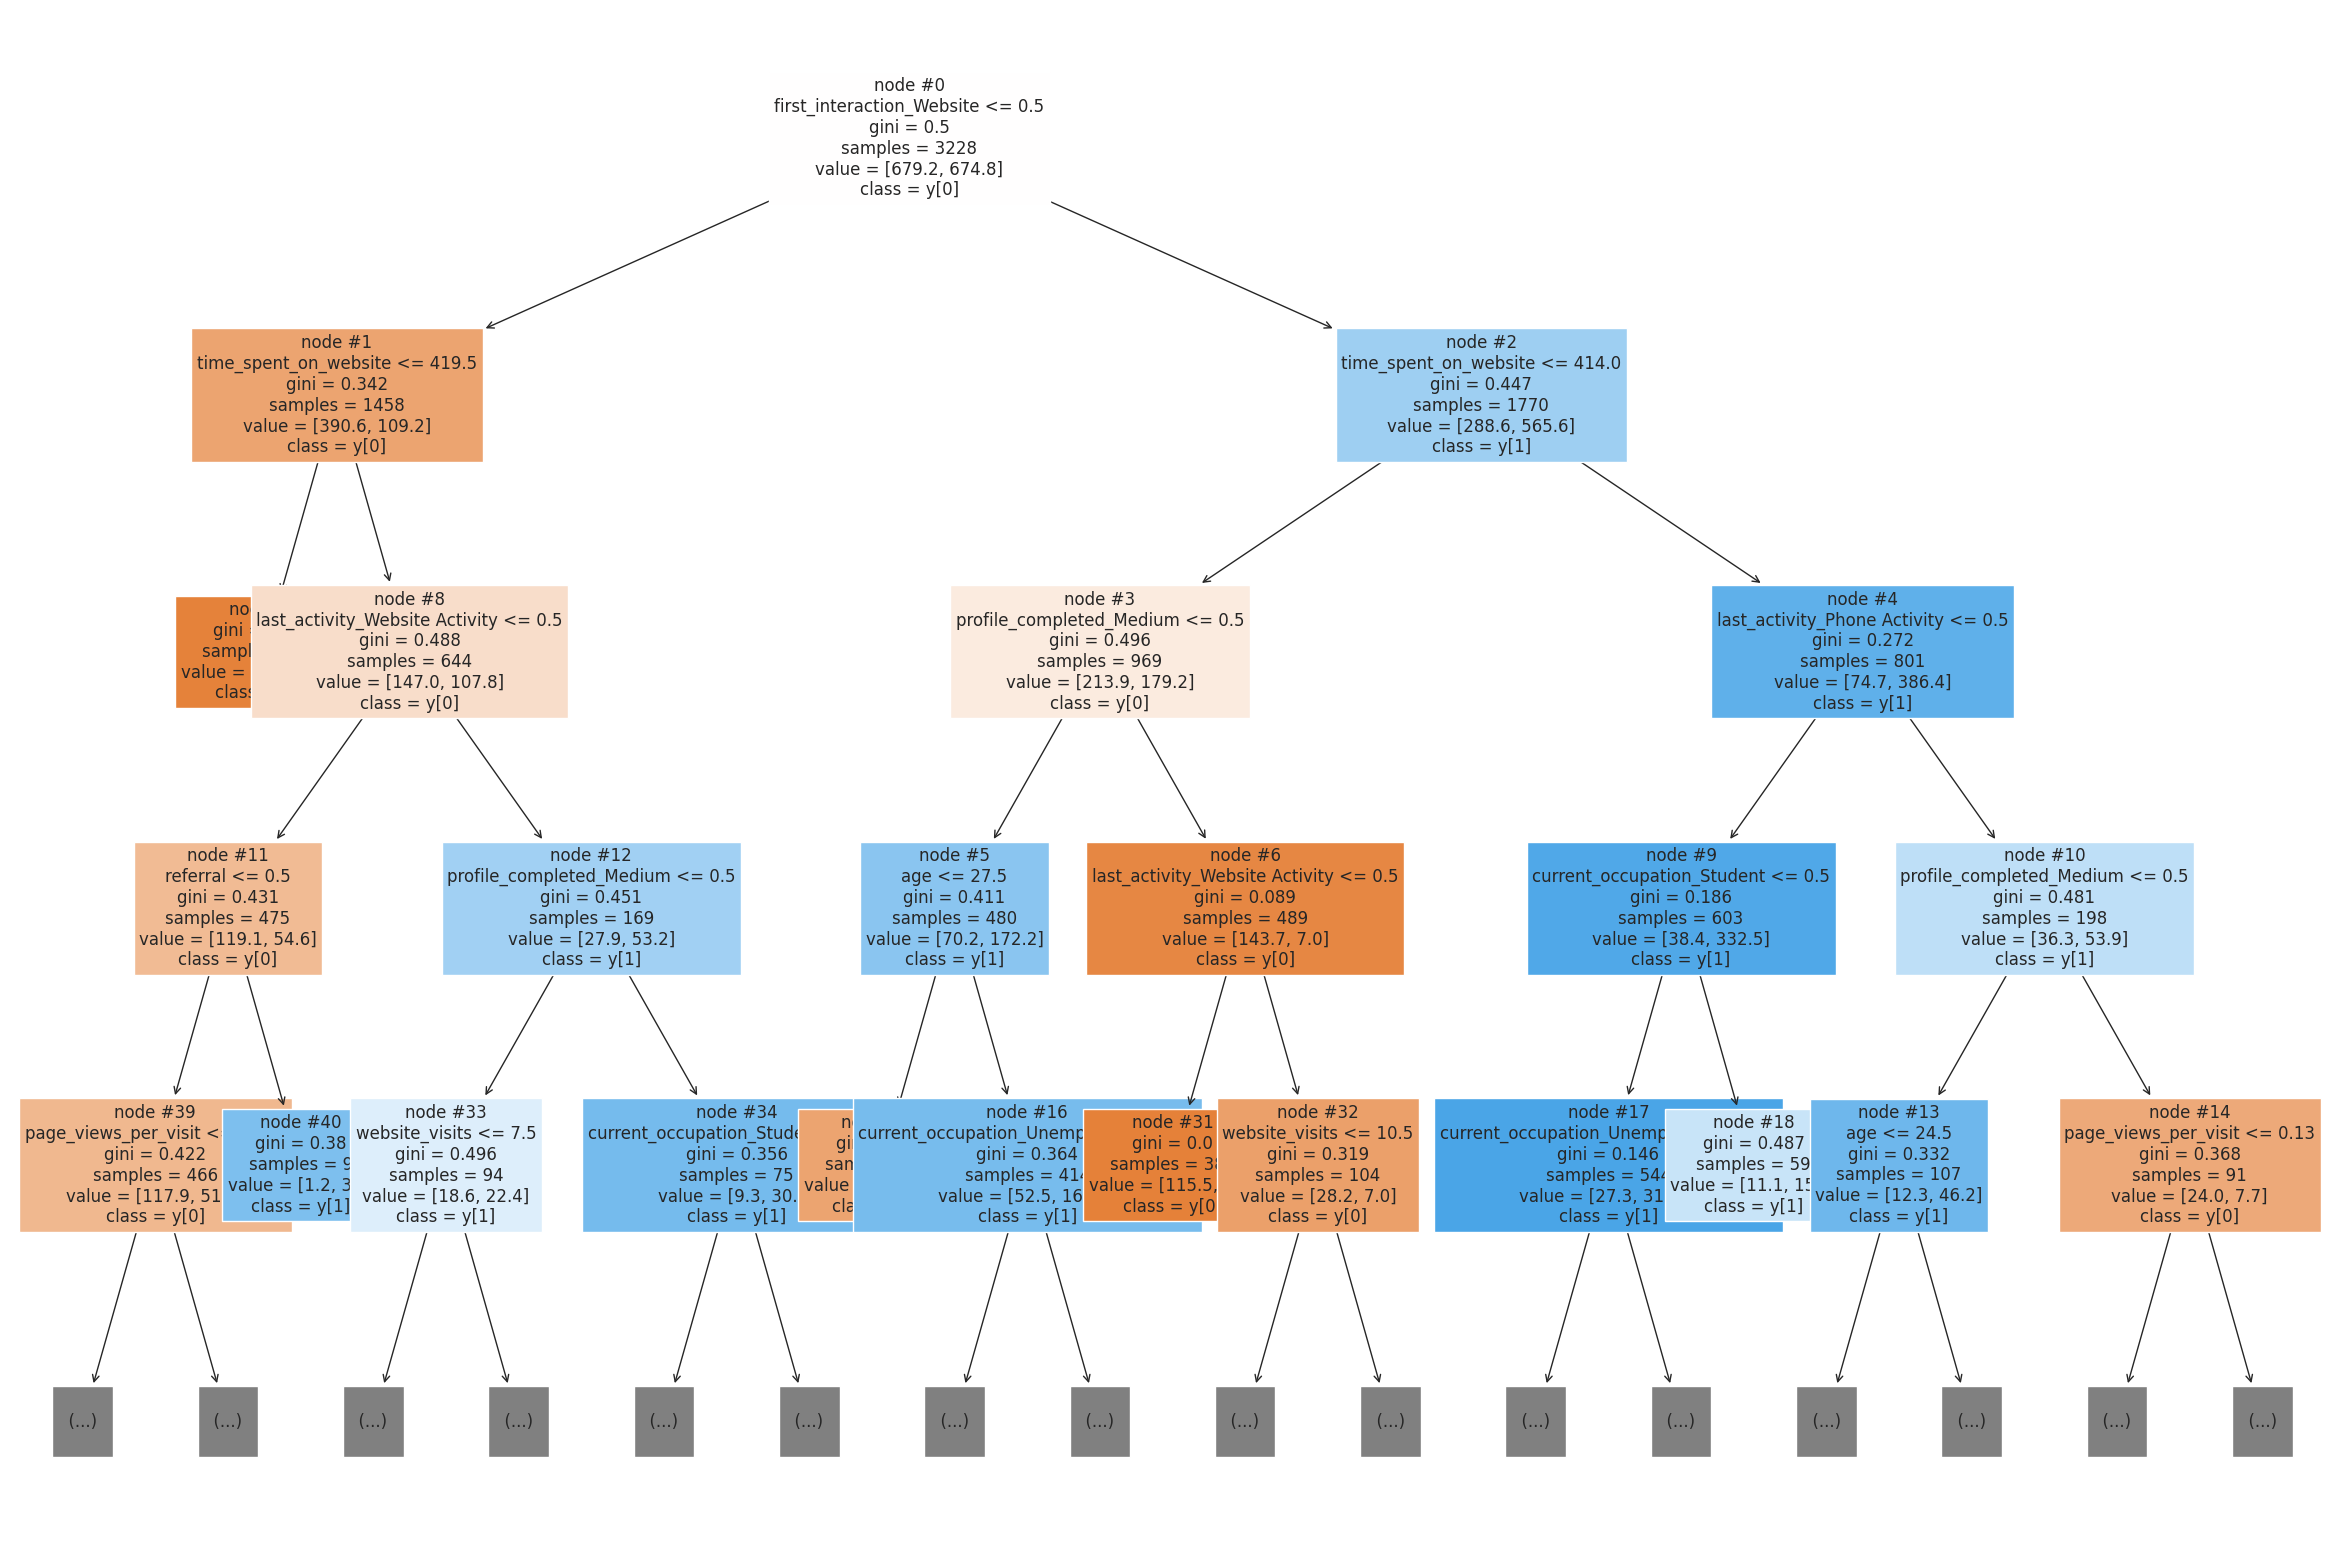

In [ ]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(estimator, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

<Axes: xlabel='Importance'>

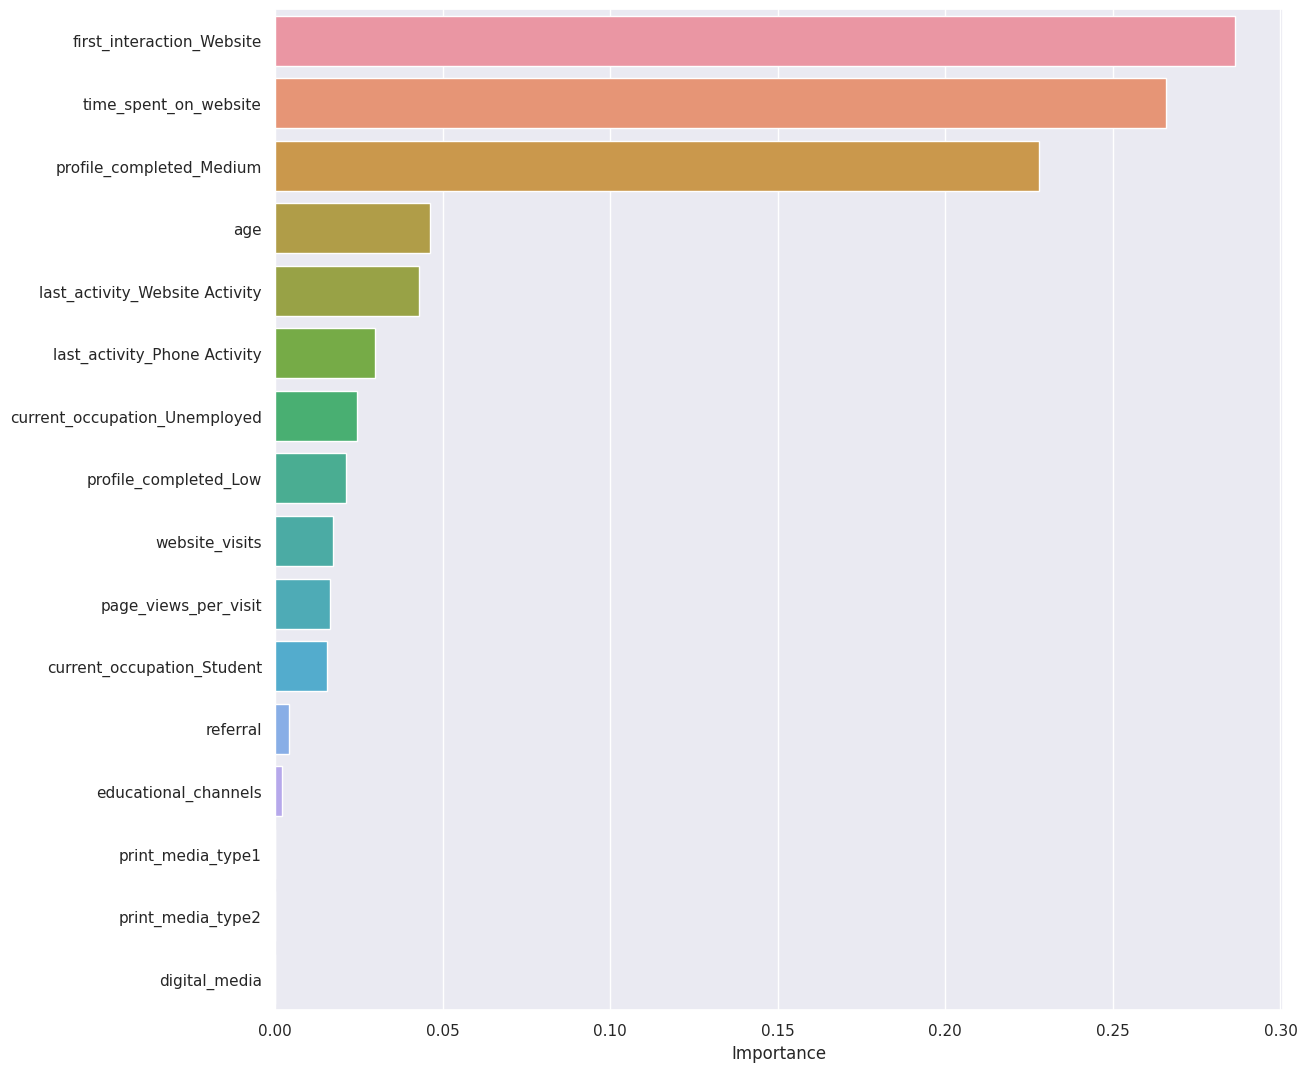

In [ ]:
importances = estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index)


**Observations:**

According to the tuned Decision Tree First_Interaction_Website  is the most important feature, followed by time_spent_on_website,completion of profile Medium, Age,  Website Activity.

## Building a Random Forest model

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



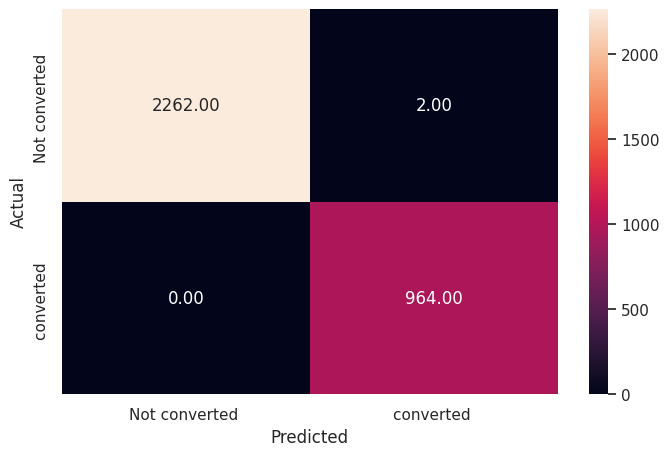

In [ ]:
rf_train = rf_estimator.predict(X_train)
metrics_score(y_train, rf_train)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       971
           1       0.78      0.71      0.74       413

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



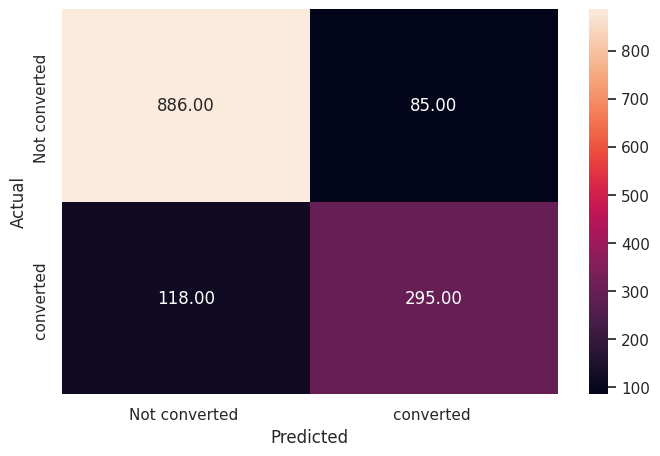

In [ ]:
rf_test = rf_estimator.predict(X_test)
metrics_score(y_test, rf_test)

**Observations:**

* The Random Forest works well on the training data but not so well on the test data as the recall is 0.71 in comparison to 1 for the training dataset, i.e., the Random Forest is overfitting the training data.
* The precision on the test data suggests that there's a 22% (1 - 0.78) chance that the model will predict that a person is going to become paied customer.

<Axes: xlabel='Importance'>

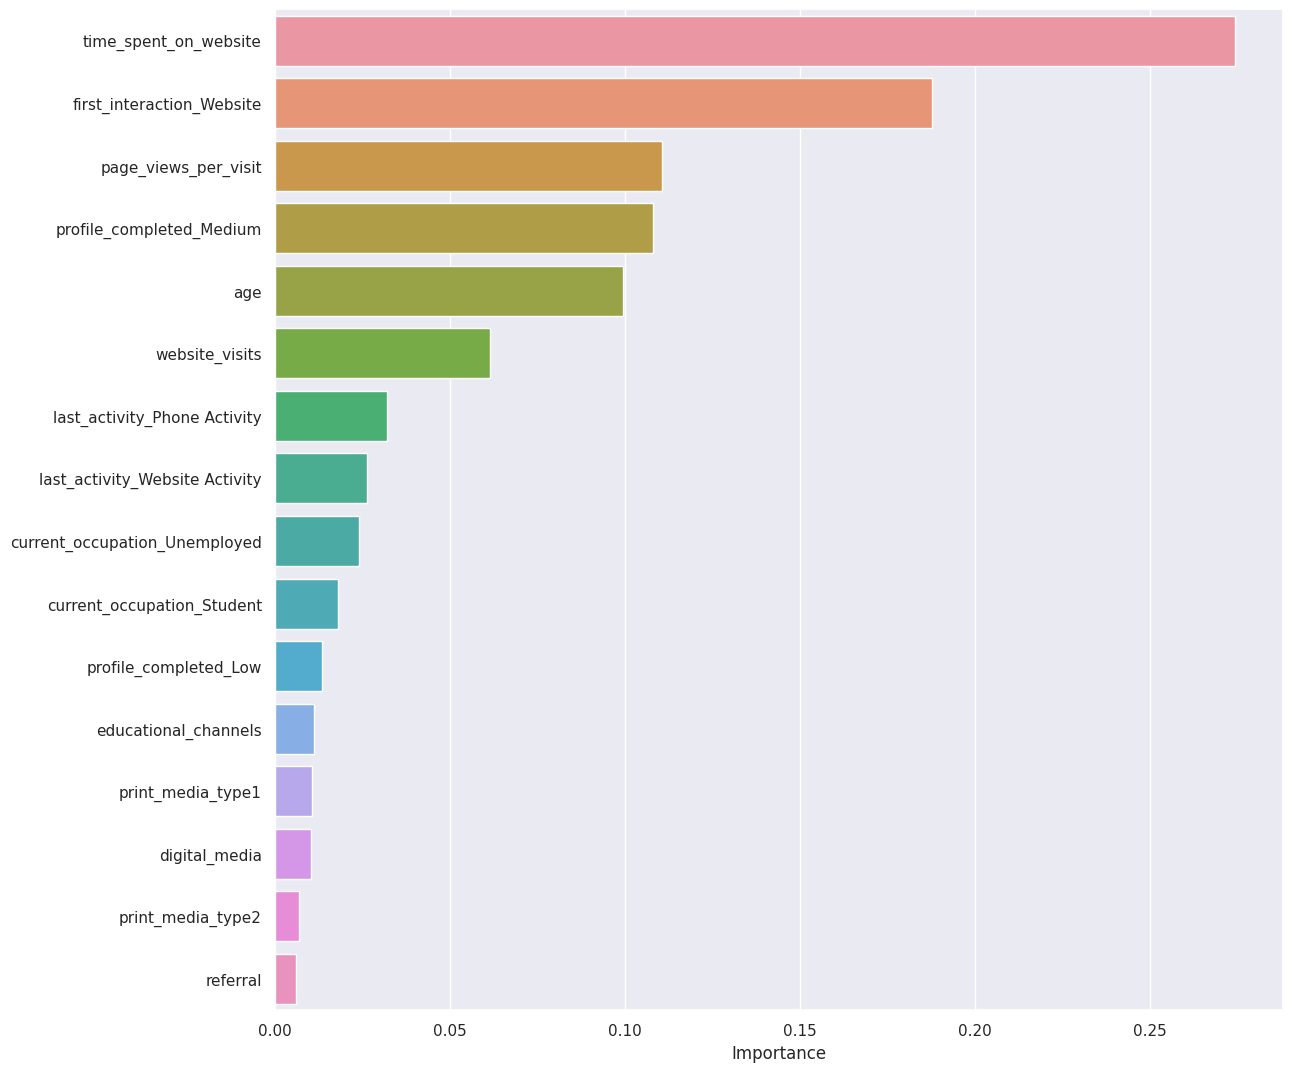

In [ ]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index)


**Observations:**

According to the Random Forest time_spent_on_website is the most important feature, followed by First_Interaction_Website,page views per visit,profile_completeon Medium, Age,  Website Visits.

## Do we need to prune the tree?

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features='auto',
                       min_samples_leaf=3, n_estimators=500, random_state=1)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2264
           1       0.85      0.94      0.89       964

    accuracy                           0.93      3228
   macro avg       0.91      0.94      0.92      3228
weighted avg       0.94      0.93      0.93      3228



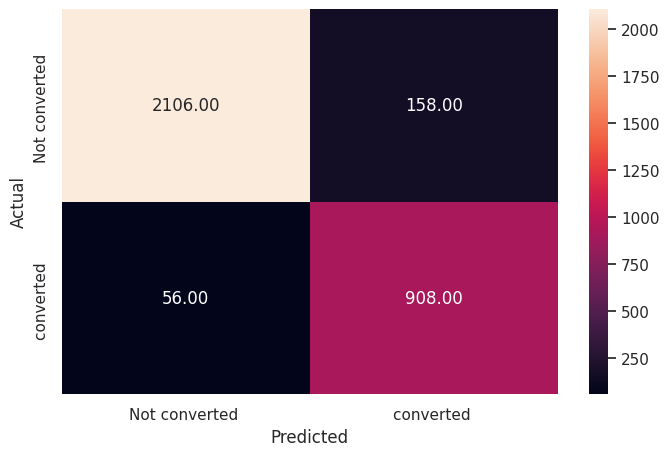

In [ ]:
rf_tuned_train = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, rf_tuned_train)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       971
           1       0.74      0.79      0.76       413

    accuracy                           0.85      1384
   macro avg       0.82      0.83      0.83      1384
weighted avg       0.86      0.85      0.86      1384



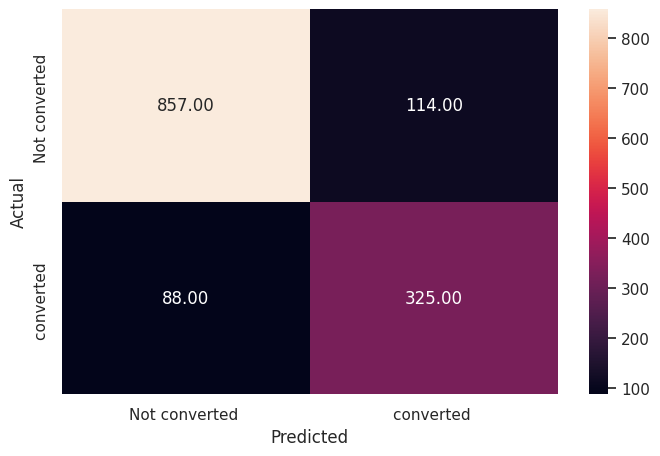

In [ ]:
rf_tuned_test = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, rf_tuned_test)

**Observations:**
* Hyperparameter tune helped to improve the model perfomance. Therefor pruning of the tree was needed
* Model does not demonstrate massive overfitting of the data the recall is the test set is 0.94 in comparison to 0.79 for the training dataset.
* The precision on the test data suggests that there's a 26% (1 - 0.74) chance that the model will predict that a person is going to become paied customer.

<Axes: xlabel='Importance'>

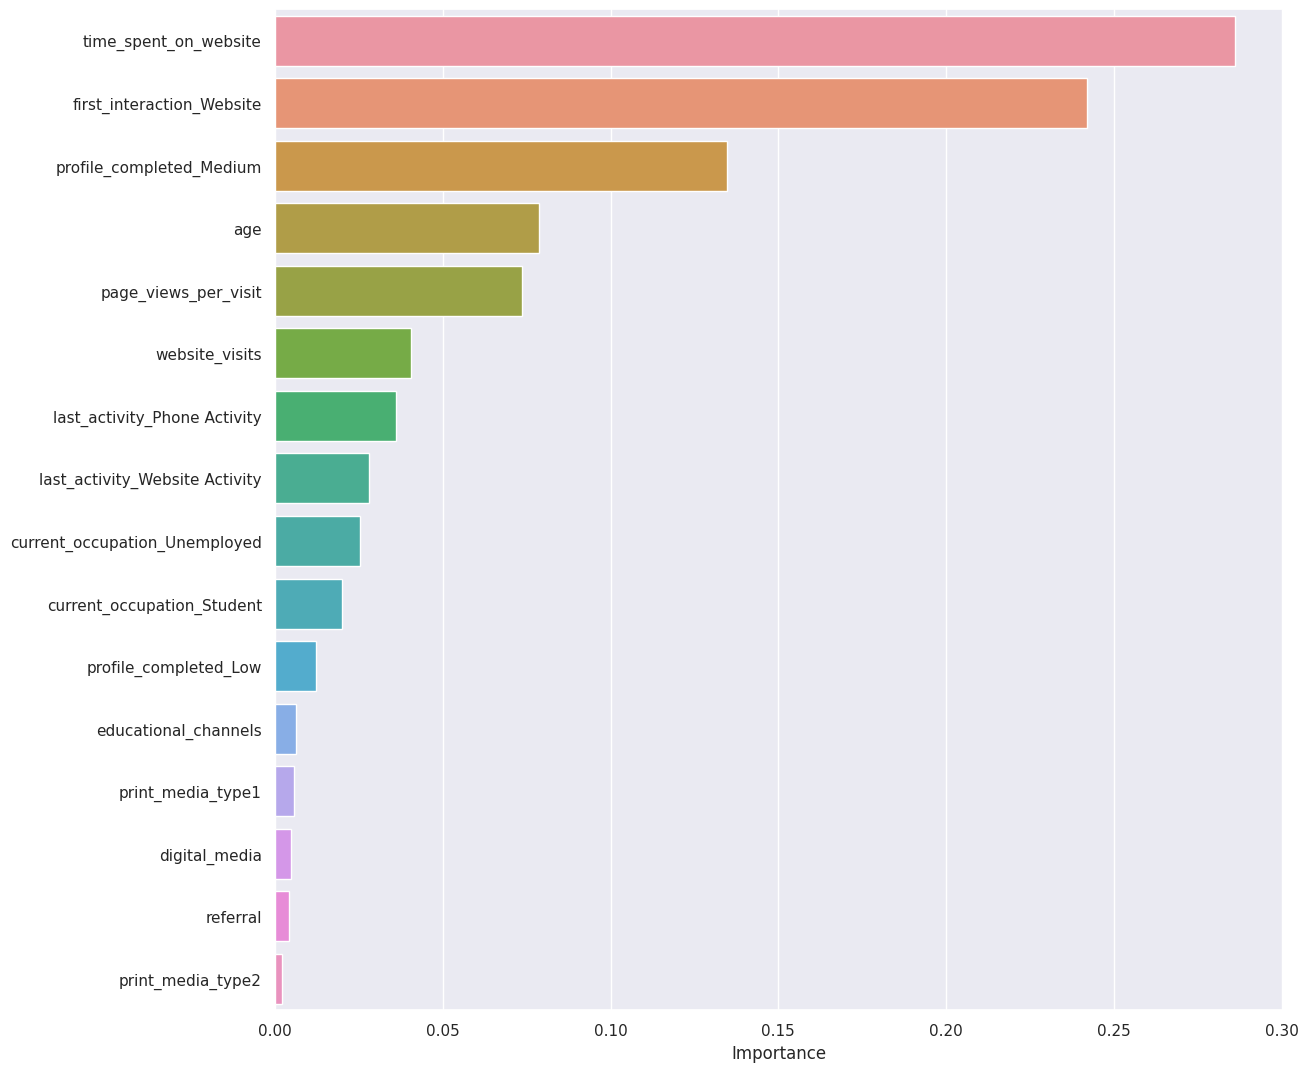

In [ ]:
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index)


**Observations:**

According to the Random Forest time_spent_on_website is the most important feature, followed by First_Interaction_Website,page views per visit,profile_completeon Medium, Age,  Website Visits.

## Actionable Insights and Recommendations

## **Recommendations:**

- We saw that **time_spent_on_website  is the most important driver of lead status.** The Name should trace leads who spent long time on the website and get cotact them or offer the  promotion to lean them to take desicion faster.
-The leads who first contacted Name through the website has higher conversion.One can analyse how to improve service provided by the whats app.
- As observed early the leads with medium or high filled profile tend to be converted to th paied customers. Name should focus their attention on such groups of leads.
-  Typical lead which has higer convertion rate to a paid customer is Professional of age with high or Medium filled profile. Such lead would tend to spent longer time at the website and visit more web pages.  

